# How to Save a Machine Learning Model?

Whenever we want to solve the same problem on a new dataset with the same features that we solved before then we can use the same machine learning model that we trained earlier. But to use the same model again we need to save the model. So in this article, I will take you through a tutorial on how to save a machine learning model using Python.

## Why do We Need to Save a Machine Learning Model?

After training a machine learning model, we can save it to use the same model again in the future to test it on a new dataset or compare its performance with other models. We can also use a saved machine learning model to deploy in the final application.

There are many methods of saving a machine learning model. If you have never saved a model before then in the section below you will learn how to easily save and reuse a machine learning model by using the Python programming language.

### Steps to Save a Machine Learning Model

Below are the steps for saving a machine learning model:

##### 1. First train a model
##### 2. Then convert it into a byte stream
##### 3. Save the byte stream as a binary file

So these were the steps for saving a machine learning model. In the Python programming language, the concept of converting a machine learning model into a byte stream is known as pickling, and if you want to use the saved model again then you have to convert the byte stream file into a usable machine learning model which is known as unpickling.


Now let’s see how to save a machine learning model. Here I will first train a linear regression model and then I will save it by using the pickle method in Python

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Data Loading

In [66]:
data = pd.read_csv(r'./data/student_mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [67]:
print(data.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Data Pre-Processing

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [69]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [70]:
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

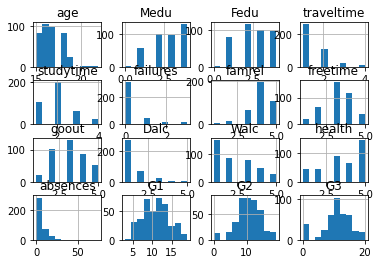

In [71]:
data.hist()

## Let's Check Null Values in dataser

In [72]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

so there is no null values

## Feature Selection

In [73]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

feature = np.array(data.drop([predict], 1))
target = np.array(data[predict])

C:\Users\User\AppData\Local\Temp\ipykernel_4252\1212246031.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## Splitting the data

In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2)

## Training a machine learning model

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

## Model Score

In [76]:
prediction = model.predict(xtest)


In [77]:
prediction

array([12.97455197,  9.55302186,  7.241262  ,  6.86022229, 14.0869953 ,
       13.45284503,  8.69936036,  7.60774949, 11.65417653, 10.07051336,
        8.31504733, 12.91082579, 19.13853239,  8.6388477 ,  8.44508443,
       -0.7973048 , 11.19712553, 12.15306546, 13.50953158, -1.74214241,
        5.86491836, 15.12662851,  9.71529376,  8.49654674, 12.90441493,
       15.70921072,  4.62393329, 11.34208723, 12.84902076, 11.86982805,
       12.63272305,  3.17689983, 10.82186284, 19.50747762,  8.22878672,
        5.95629745,  3.49803948, 10.82186284, 12.31404115,  7.429557  ,
        5.7657477 , 13.88797418,  6.84786502, 14.0432188 , 16.35169299,
       13.53975182,  8.28089521,  6.41792651,  4.42300338,  3.91111099,
        9.20340137,  7.40545122,  9.11392724, 14.32317054, 14.68057025,
       16.41671154,  6.85209328,  9.34514956,  8.87638747,  9.78031231,
       11.96899872, 14.48414623, 13.90989603,  5.11694796, -1.03280877,
        9.71078786, 15.07892015,  5.54910019, 15.94996401,  8.80

## Now Lets Save This Model for Using on another Dataset

In [78]:
import pickle

In [79]:
with open("pickle_model", "wb") as file:
    pickle.dump(model, file)

So we have saved the model, you can see a new file created as “pickle_model” in the same directory where your Python file is. Now if you want to use the saved model to predict values on the test set then you can run the code mentioned below

In [80]:
with open("pickle_model", "rb") as file:
    model = pickle.load(file)

predictions = model.predict(xtest)

for i in range(len(predictions)):
    print(predictions[feature], xtest[feature], [ytest[feature]])


[[13.45284503  8.69936036  7.241262   12.97455197  8.69936036]
 [13.45284503 13.45284503  7.241262   12.97455197 14.0869953 ]
 [ 7.60774949 11.65417653  7.241262    6.86022229  8.31504733]
 ...
 [ 8.31504733 11.65417653  9.55302186  6.86022229  6.86022229]
 [12.91082579 19.13853239  9.55302186 12.97455197 12.97455197]
 [11.65417653 10.07051336  9.55302186 12.97455197 13.45284503]] [[[13 13  2  0 14]
  [ 8  8  1  0 30]
  [ 8  8  2  0  2]
  [13 12  1  0 20]
  [ 8  8  1  0 30]]

 [[13 13  2  0 14]
  [13 13  2  0 14]
  [ 8  8  2  0  2]
  [13 12  1  0 20]
  [13 14  1  0  0]]

 [[ 7  9  2  2  6]
  [13 12  3  0  1]
  [ 8  8  2  0  2]
  [ 9  7  2  1 20]
  [ 8  9  2  0  4]]

 ...

 [[ 8  9  2  0  4]
  [13 12  3  0  1]
  [ 8 10  1  0  4]
  [ 9  7  2  1 20]
  [ 9  7  2  1 20]]

 [[16 12  1  0  8]
  [18 18  1  0  8]
  [ 8 10  1  0  4]
  [13 12  1  0 20]
  [13 12  1  0 20]]

 [[13 12  3  0  1]
  [11 11  4  0  0]
  [ 8 10  1  0  4]
  [13 12  1  0 20]
  [13 13  2  0 14]]] [array([[14,  8,  8, 12,  8]

## Summary

So this is how a machine learning model can be easily saved as a byte stream so that we can use it in future on a new dataset. I hope you liked this article on steps for saving a machine learning model by using the Python programming language. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

#### LinkedIn - https://www.linkedin.com/in/shekhnirob1

#### GitHub - https://github.com/Rasel1435

#### Behance - https://www.behance.net/Shekhrasel2513